# импортируем библиотеки

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Открываем файл

In [2]:
train = pd.read_csv('/Users/ivanpatrashev/Downloads/cmf-2022-bank-scoring-case (1)/X_train.csv')
train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0
...,...,...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,0,2,0,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,0,2,0,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0,1,0.0


In [3]:
train.overdue__more_than_90_days.describe()

count    105109.000000
mean          0.269967
std           4.227366
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: overdue__more_than_90_days, dtype: float64

In [4]:
test = pd.read_csv('/Users/ivanpatrashev/Downloads/cmf-2022-bank-scoring-case (1)/X_test.csv')
test

,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
38871,44475,0.731740,39,0,0.251005,3474.894386,5,0,0,0,0.0
38872,103189,0.010959,70,0,0.152539,4170.426464,14,0,1,0,0.0
38873,48732,0.084612,52,0,5288.053772,NaN,15,0,2,0,0.0
38874,135410,0.741717,51,0,0.378356,5441.458787,9,0,2,0,0.0


In [5]:
test.overdue__more_than_90_days.describe()

count    38876.000000
mean         0.252598
std          3.999838
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: overdue__more_than_90_days, dtype: float64

In [6]:
outcome = pd.read_csv('/Users/ivanpatrashev/Downloads/cmf-2022-bank-scoring-case (1)/y_train.csv', usecols = ['target'])

<AxesSubplot:>

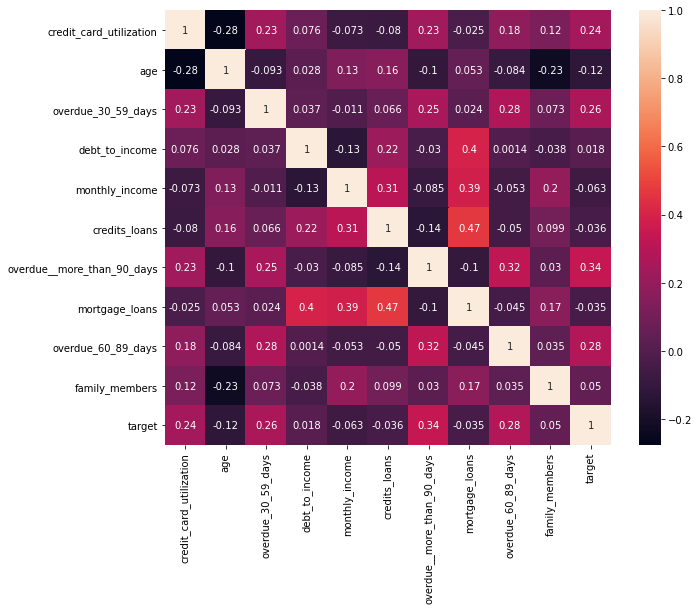

In [7]:
train_corr = train.copy()
train_corr['target'] = outcome['target']

plt.figure(figsize = (10,8))
sns.heatmap(train_corr.corr(method = 'spearman'),annot = True)

## соединяем train и test чтобы было удобнее обрабатывать данные

In [8]:
train['Test'] = False
test['Test'] = True
data = pd.concat([train,test], ignore_index = True)
data = data[['age', 'family_members','credits_loans','mortgage_loans', 'monthly_income','debt_to_income','credit_card_utilization','overdue_30_59_days', 'overdue_60_89_days','overdue__more_than_90_days','Test','index']]
data

,age,family_members,credits_loans,mortgage_loans,monthly_income,debt_to_income,credit_card_utilization,overdue_30_59_days,overdue_60_89_days,overdue__more_than_90_days,Test,index
0,56,5.0,9,1,6823.894458,0.504328,0.000000,0,0,0,False,NaN
1,45,0.0,5,0,356.580765,2.405860,0.170659,1,0,0,False,NaN
2,75,0.0,9,3,20349.895825,0.445066,0.342176,1,0,0,False,NaN
3,50,3.0,12,1,2894.368968,0.814508,0.046219,0,0,0,False,NaN
4,58,2.0,15,4,24833.227614,0.390311,0.679556,0,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
143980,39,0.0,5,0,3474.894386,0.251005,0.731740,0,0,0,True,44475.0
143981,70,0.0,14,1,4170.426464,0.152539,0.010959,0,0,0,True,103189.0
143982,52,0.0,15,2,NaN,5288.053772,0.084612,0,0,0,True,48732.0
143983,51,0.0,9,2,5441.458787,0.378356,0.741717,0,0,0,True,135410.0


## Построим распределения чтобы понять, какие есть выбросы, паттерны и т.д.

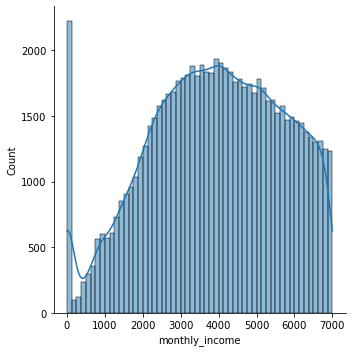

In [9]:
sns.displot(data[data['monthly_income']<7000]['monthly_income'],kde = True)


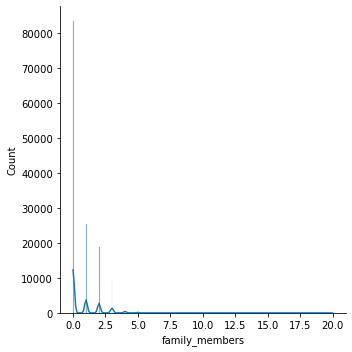

In [10]:
sns.displot(data['family_members'],kde = True)

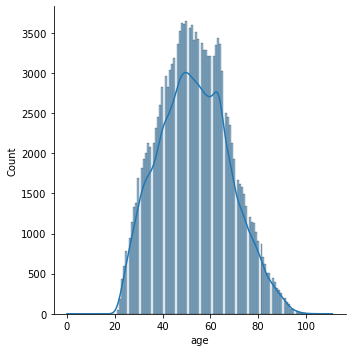

In [11]:
sns.displot(data['age'],kde = True)

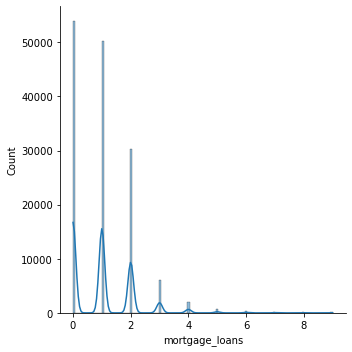

In [12]:
sns.displot(data[data['mortgage_loans']<10]['mortgage_loans'],kde = True)

In [13]:
outcome.shape

(105109, 1)

In [14]:
train.shape

(105109, 11)

## Проверим данные на пропуски и заполним их

In [15]:
data.isnull().sum()

age                                0
family_members                  3760
credits_loans                      0
mortgage_loans                     0
monthly_income                 28538
debt_to_income                     0
credit_card_utilization            0
overdue_30_59_days                 0
overdue_60_89_days                 0
overdue__more_than_90_days         0
Test                               0
index                         105109
dtype: int64

In [16]:
data.monthly_income= data.monthly_income.fillna(statistics.median(data.monthly_income))

In [17]:
data.family_members= data.family_members.fillna(statistics.mode(data.family_members))

## Разделим данные  на train и test обратно

In [18]:
test_index = test['index']
test_index

0        143522
1        116747
2         66075
3        133292
4         83134
          ...  
38871     44475
38872    103189
38873     48732
38874    135410
38875     73457
Name: index, Length: 38876, dtype: int64

In [19]:
data.drop(['index'], axis = 1, inplace = True)

In [20]:
train = data[data.Test == 0].reset_index(drop = True)

In [21]:
test = data[data.Test == 1].reset_index(drop = True)

## Посмотрим на распределение классов

Text(0.5, 1.0, 'Target distribution')

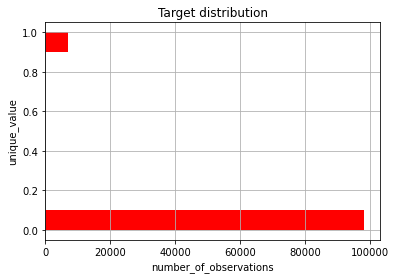

In [22]:
ax = outcome['target'].hist(orientation='horizontal', color='red')
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

In [23]:
X = train.copy()
y = outcome.copy()

## Делим выборку на train и test и cкейлим данные

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape

(84087, 11)

In [25]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()

In [26]:
X_train_s = scaler.fit_transform(X_train)

In [27]:
X_test_s = scaler.transform(X_test)

## Логистисческая регрессия

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(random_state=5, class_weight='balanced')

## hyperparameter tuning

In [29]:
parameters = {'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [31]:
grid_search = GridSearchCV(lr, parameters, n_jobs=-1, scoring='roc_auc', cv=skf)
grid_search = grid_search.fit(X_train, np.ravel(y_train))
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced', random_state=5)

In [32]:
grid_search.cv_results_['std_test_score'][1]

0.007730598419063757

In [33]:
grid_search.best_score_

0.8104724239381316

In [34]:
lr = LogisticRegression(C=0.01, class_weight='balanced', random_state=5)

In [66]:
lr.fit(X_train,np.ravel(y_train))

/Users/ivanpatrashev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, class_weight='balanced', random_state=5)

In [36]:
score = lr.score(X_test, y_test)
score

0.8703263248025878

In [37]:
y_pred = lr.predict_proba(X_test)[:,1]
y_pred

array([0.35023967, 0.41715572, 0.32411474, ..., 0.41970367, 0.41124215,
       0.23865661])

## Посмотрим на основные метрики

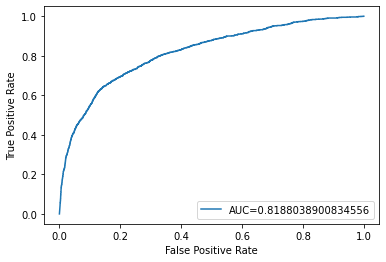

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

получаем уже неплохой скор просто сбалансировав классы посмотрев гиперпараметры

In [39]:
# from sklearn.metrics import precision_score, recall_score, f1_score
# scores = y_pred

In [40]:
# p = np.zeros_like(tr)
# r = np.zeros_like(tr)
# f = np.zeros_like(tr)
# for k,x in enumerate(tr):
#     y_pred = (scores >=x)*1
#     p[k] = precision_score(y_val,y_pred)
#     r[k] = recall_score(y_val,y_pred)
#     f[k] = f1_score(y_val, y_pred)



In [44]:
 y_pred = lr.predict_proba(test)[:,1]
 y_pred

array([0.28835369, 0.24588217, 0.60797451, ..., 0.34545659, 0.3538957 ,
       0.0150475 ])

## XGboost

In [45]:
from xgboost import XGBClassifier

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [47]:
xgb_model = XGBClassifier(max_depth=4,learning_rate=0.05,n_estimators=200)

In [48]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=3,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
score = xgb_model.score(X_train,y_train)
score

0.9394793487697266

In [50]:
xgb_model.score(X_test,y_test)

0.9408238987727143

In [51]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=3,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## hyperparameter tuning

In [53]:
params = {
#      'max_depth': [1,3,4],
     'learning_rate':[0.01, 0.05, 0.1,0.15],
    'n_estimators': [1,10,50,70,150,200],
#     'max_leaves':[0,1,2],
#     'max_cat_to_onehot':[3,4,5]
}
grid_search = GridSearchCV(xgb_model, param_grid = params,cv = 3, scoring='roc_auc', n_jobs = -1, verbose = 0)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=3,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [54]:
grid_search.score(X_train,y_train)

0.8748461222544497

In [55]:
grid_search.score(X_test,y_test)

0.8692051722175569

In [56]:
grid_search.best_score_   

0.8609387723170885

In [57]:
# xgb_model1 = XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=150)
# xgb_model1.fit(X_train,y_train)

In [58]:
y_pred = xgb_model.predict_proba(X_test)[:,1]
y_pred

array([0.01095552, 0.10757727, 0.00560266, ..., 0.0421582 , 0.02055134,
       0.00476515], dtype=float32)

## Посмотрим на основные метрики, заметим сильное улучшение по сравнению с логистической регрессией. Эту модель и выберем в качестве финальной

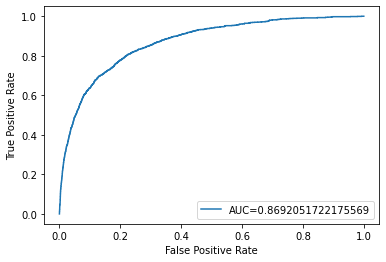

In [59]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [69]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

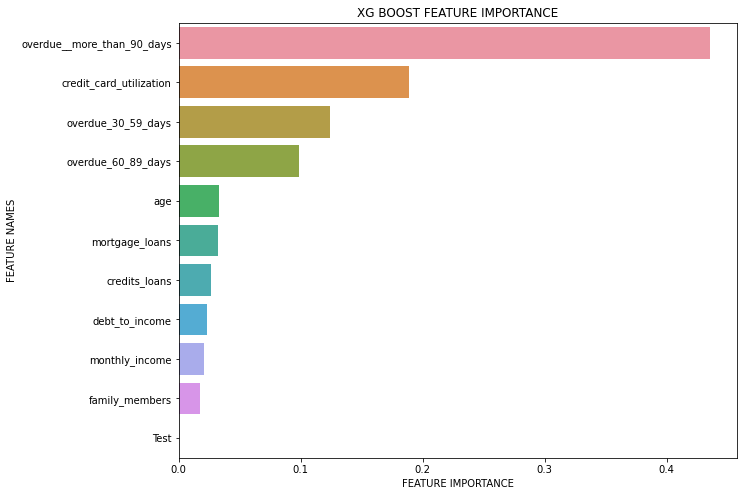

In [71]:
plot_feature_importance(xgb_model.feature_importances_,X_train.columns,'XG BOOST ')

In [60]:
y_pred1 = xgb_model.predict_proba(test)[:,1]

In [61]:
y_pred1

array([0.00670393, 0.00923387, 0.12611225, ..., 0.01502486, 0.07626578,
       0.00447737], dtype=float32)

In [62]:
output = pd.DataFrame({'index': test_index, 'target': y_pred1 })
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [63]:
y_test

,target
60524,0
5353,0
36482,0
1245,0
28439,1
...,...
16505,0
64902,0
59800,1
47437,0


In [64]:
pd.read_csv('submission.csv')

,index,target
0,143522,0.006704
1,116747,0.009234
2,66075,0.126112
3,133292,0.019068
4,83134,0.011254
...,...,...
38871,44475,0.081541
38872,103189,0.006604
38873,48732,0.015025
38874,135410,0.076266
